PWM Signal Sampling

,t,v
0,0.00000,1
1,0.00002,1
2,0.00004,1
3,0.00006,1
4,0.00008,1
...,...,...
4995,0.09990,0
4996,0.09992,0
4997,0.09994,0
4998,0.09996,0


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


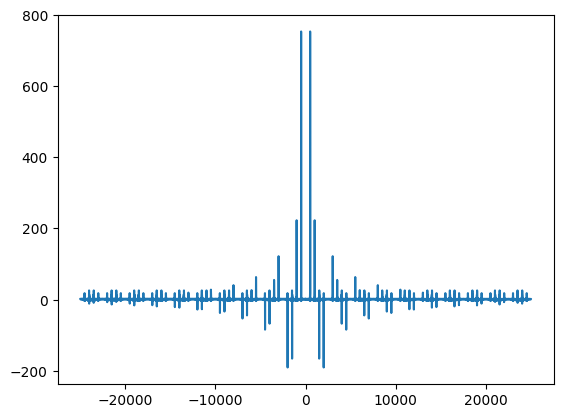

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

PWM_F = 500
PWM_FRACTION = 0.2
PWM_T = 1.0 / PWM_F

SAMPLING_F = 50000
SAMPLING_T = 1.0 / SAMPLING_F

# def PWM(time_in_cycle, pwm_fraction) -> int:
#     fraction_in_cycle = (time_in_value / PWM_T)
#     return 1 if fraction_in_cycle < pwm_fraction else 0

vs = []
ts = []
t = 0.0
while t <= 0.1:
    time_in_cycle = t % PWM_T
    fraction_in_cycle = time_in_cycle / PWM_T
    v = 1 if fraction_in_cycle <= PWM_FRACTION else 0
    vs.append(v)
    ts.append(t)
    t += SAMPLING_T

df = pd.DataFrame({'t': ts, 'v': vs})
df

# s = df['v'][:500]

# s = ts[:

fft = np.fft.fft(vs)
fft[0] = 0
fftfreq = np.fft.fftfreq(len(vs))*len(vs)/(max(ts)-min(ts))

# plt.plot(df['v'].rolling(10).mean(), label= 'Average')

# plt.plot(df['v'][:500], label= 'V')

plt.plot(fftfreq, fft)

plt.show()

# df[:3]




